# Example 2 with sci-kit learn models

This notebook shows an example of using synthetic control in a situation where we do not have untreated control units of a similar nature to the treated unit. So in this example we just have a single time series of observations and the predictor variables are simply time and month.

In [1]:
import pandas as pd
import pathlib
import arviz as az

In [2]:
az.style.use("arviz-darkgrid")

## Load data

In [3]:
its_data_path = pathlib.Path.cwd().parents[1] / "causalpy" / "data" / "its.csv"
df = pd.read_csv(its_data_path, parse_dates=["date"])
df.set_index("date", inplace=True)
treatment_time = pd.to_datetime("2017-01-01")

## Run the analysis

In [4]:
from causalpy.skl_experiments import SyntheticControl
from sklearn.linear_model import LinearRegression

result = SyntheticControl(
    df,
    treatment_time,
    formula="y ~ 1 + t + C(month)",
    prediction_model=LinearRegression(),
)

## Examine the results

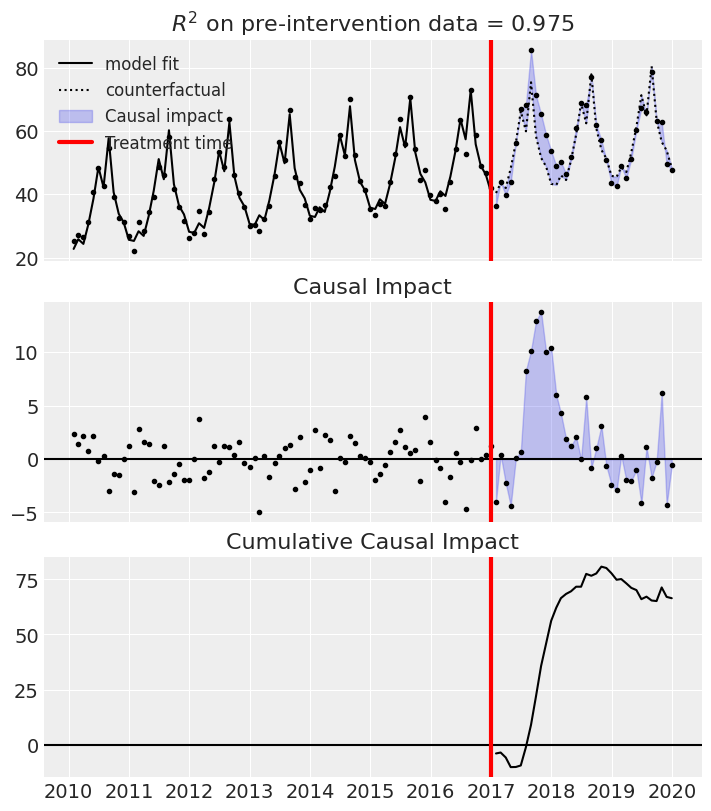

In [5]:
fig, ax = result.plot();